In [1]:
import warnings
warnings.filterwarnings('ignore')

## Import libraries

In [2]:
from tensorflow import keras

In [3]:
from keras.layers import Input, Lambda, Dense, Flatten


In [4]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Path

In [5]:
IMAGE_SIZE = [128, 128]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
for layer in vgg.layers:
    layer.trainable = False

In [8]:
folders = glob('Datasets/train/*')
x = Flatten()(vgg.output)

## Model

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

### Training Model

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

val_datagen = ImageDataGenerator(rescale = 1./255)





# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')




test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')



val_set = test_datagen.flow_from_directory('Datasets/val',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')



Found 3641 images belonging to 2 classes.
Found 455 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


### Accuracy 

In [13]:
m = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
114/114 [==============================] - 378s 3s/step - loss: 0.0892 - accuracy: 0.9681 - val_loss: 0.0375 - val_accuracy: 0.9824
Epoch 2/5
114/114 [==============================] - 337s 3s/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0348 - val_accuracy: 0.9846
Epoch 3/5
114/114 [==============================] - 345s 3s/step - loss: 0.0351 - accuracy: 0.9887 - val_loss: 0.0455 - val_accuracy: 0.9846
Epoch 4/5
114/114 [==============================] - 298s 3s/step - loss: 0.0283 - accuracy: 0.9896 - val_loss: 0.0323 - val_accuracy: 0.9890
Epoch 5/5
114/114 [==============================] - 328s 3s/step - loss: 0.0242 - accuracy: 0.9915 - val_loss: 0.0459 - val_accuracy: 0.9846


In [14]:
print("Evaluate on Test Data")
result = model.evaluate(test_set, batch_size= 32)
print("test loss, test acc :", result)

Evaluate on Test Data


15/15 [==============================] - 39s 3s/step - loss: 0.0459 - accuracy: 0.9846
test loss, test acc : [0.045947086066007614, 0.9846153855323792]


In [15]:
model.save('model.h5')

### Plotting

In [16]:
def plot(history):
    fig, axes = plt.subplots(1, 2, figsize = (10, 4))
    axes[0].plot(history["loss"],"r-", history['val_loss'], "b-", linewidth = 0.5 )
    axes[0].set_title("Loss Curve")
    axes[1].plot(history["accuracy"], "r-", history["val_accuracy"], "b-", linewidth = 0.5)
    axes[1].set_title("Accuracy Curve")
    fig.tight_layout()
    fig.show()

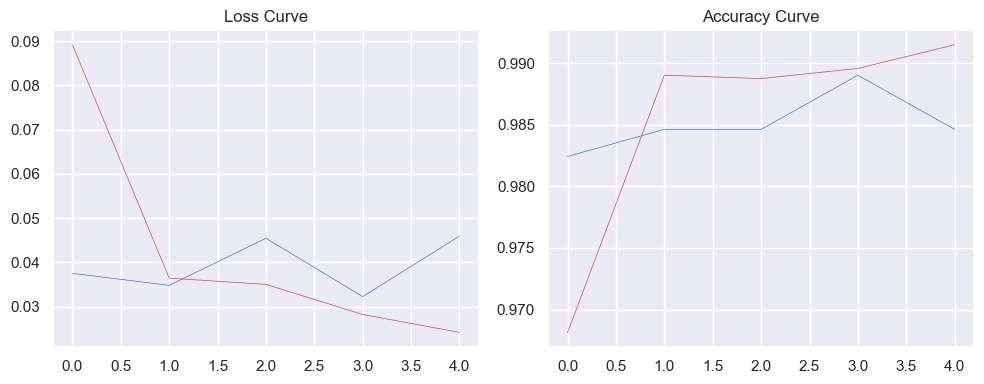

In [17]:
plot(m.history)

### Predictions

In [18]:
import cv2

Text(0.5, 1.0, 'Tesing Image')

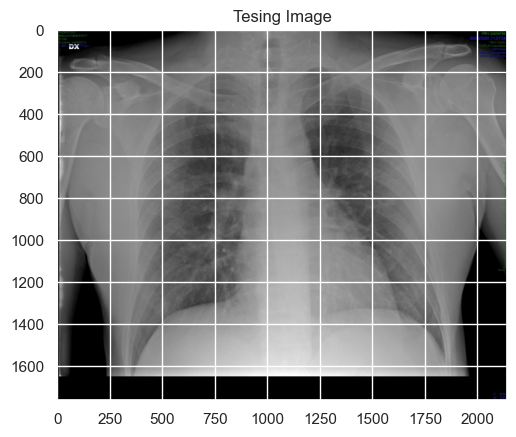

In [19]:
img = cv2.imread('C:/Users/Dell/Desktop/Artificial Intelligence/Covid 19/Datasets/test/COVID/COVID-19 (1154).jpg') 

plt.imshow(img)
plt.title("Tesing Image")

In [20]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [46]:
mymodel = load_model('model.h5')

In [51]:
img = image.load_img(r'E:\Covid02.jpg', target_size= (128, 128) )
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)

img_data = preprocess_input(x)

classes = mymodel.predict(img_data)

result = int (classes[0][0])


if result == 1 :
    print("Person is Affected By Covid- 19")
else :
    print("Person is not Affected By Covid- 19")



1/1 [==============================] - 0s 110ms/step
Person is not Affected By Covid- 19


### Confusion Matrix

In [23]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle= False)

Found 455 images belonging to 2 classes.


In [24]:
Y_pred = np.argmax(mymodel.predict_generator(test_set), axis=1)

In [25]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
Y_test = test_set.classes
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(Y_test, Y_pred)
print('confusion_matrix : \n', cm)

confusion_matrix : 
 [[121   7]
 [  0 327]]


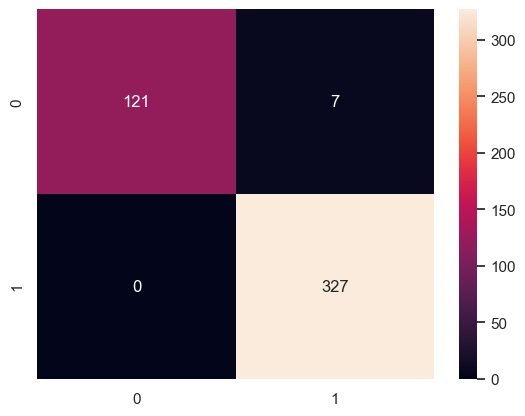

In [29]:
cm = sns.heatmap(cm, annot = True, fmt = 'd')

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(Y_test, Y_pred, target_names=['COVID- 19', 'Normal']))

              precision    recall  f1-score   support

   COVID- 19       1.00      0.95      0.97       128
      Normal       0.98      1.00      0.99       327

    accuracy                           0.98       455
   macro avg       0.99      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



### ROC - AUC

In [32]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score, roc_curve, auc

ROC AUC Score: 0.97265625


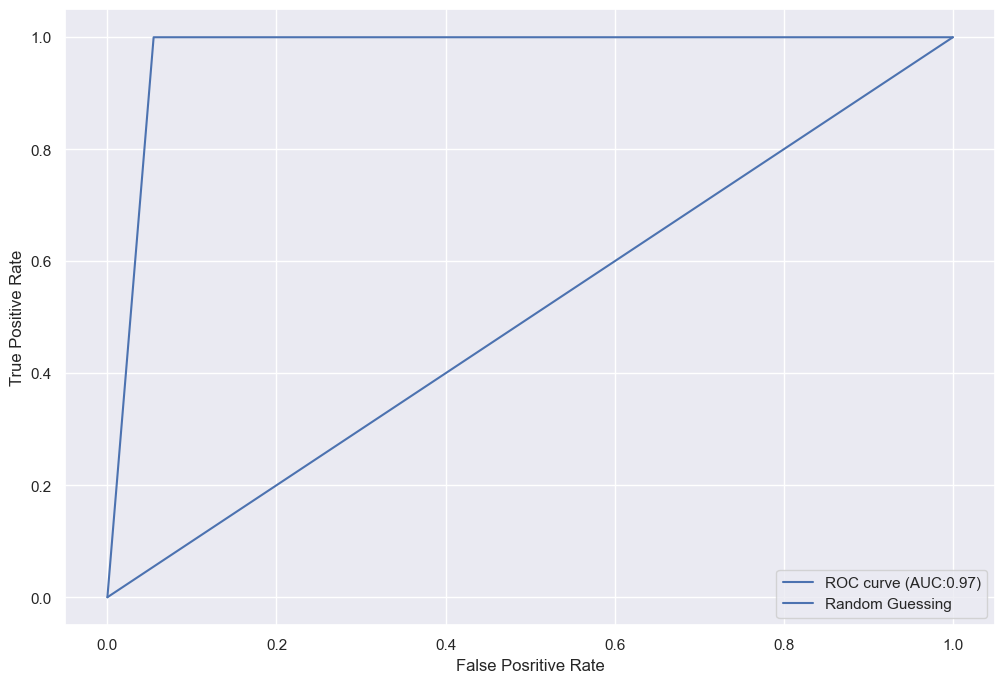

In [33]:
target = ['ROC curve']
fig, c_ax = plt.subplots(1, 1, figsize = (12,8))

def roc(Y_test, Y_pred, average = 'macro'):
    lb = LabelBinarizer()
    lb.fit(Y_test)
    Y_test = lb.transform(Y_test)
    Y_pred = lb.transform(Y_pred)

    for(idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(Y_test[:, idx]. astype(int), Y_pred[:, idx])
        c_ax.plot(fpr,tpr, label = '%s (AUC:%0.2f)' % (c_label, auc(fpr, tpr)))

    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(Y_test, Y_pred, average = average)
    
print("ROC AUC Score:",roc(Y_test, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Posritive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()